#***Reading Data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# **Data Informatix**

In [ ]:
df.shape

(374, 13)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **Solving Problematix**

## **NULLZ**

In [ ]:
# null values in sleep disorder represent not having a sleep disorder so instead of filling with mode, replace nulls with "No disorder" ,then proceed with the label encoding
df['Sleep Disorder'].fillna('No disorder', inplace=True)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

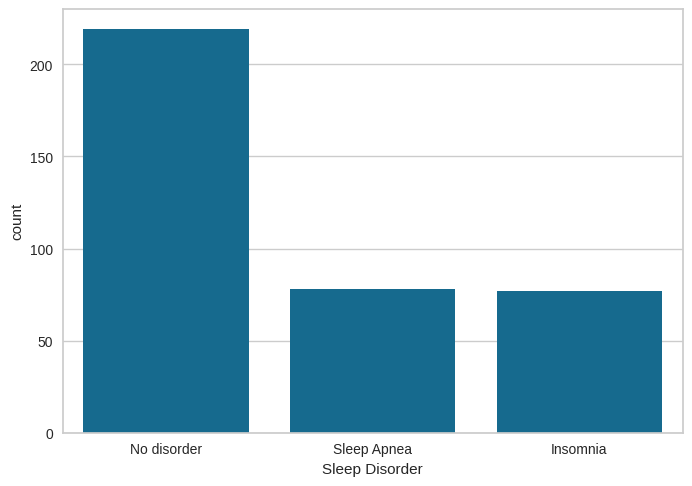

In [ ]:
sns.countplot(x='Sleep Disorder',data=df)
#problem fixed :)

## **Drop unneccary columns**

In [ ]:
df.drop(columns = ['Person ID'],inplace = True )

In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

# **Data Visualization**

In [ ]:
pd.DataFrame(df['Occupation'].value_counts(dropna=False))

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


**The nurse, doctor, and engineer occupations are the most frequently represented in the dataset.**

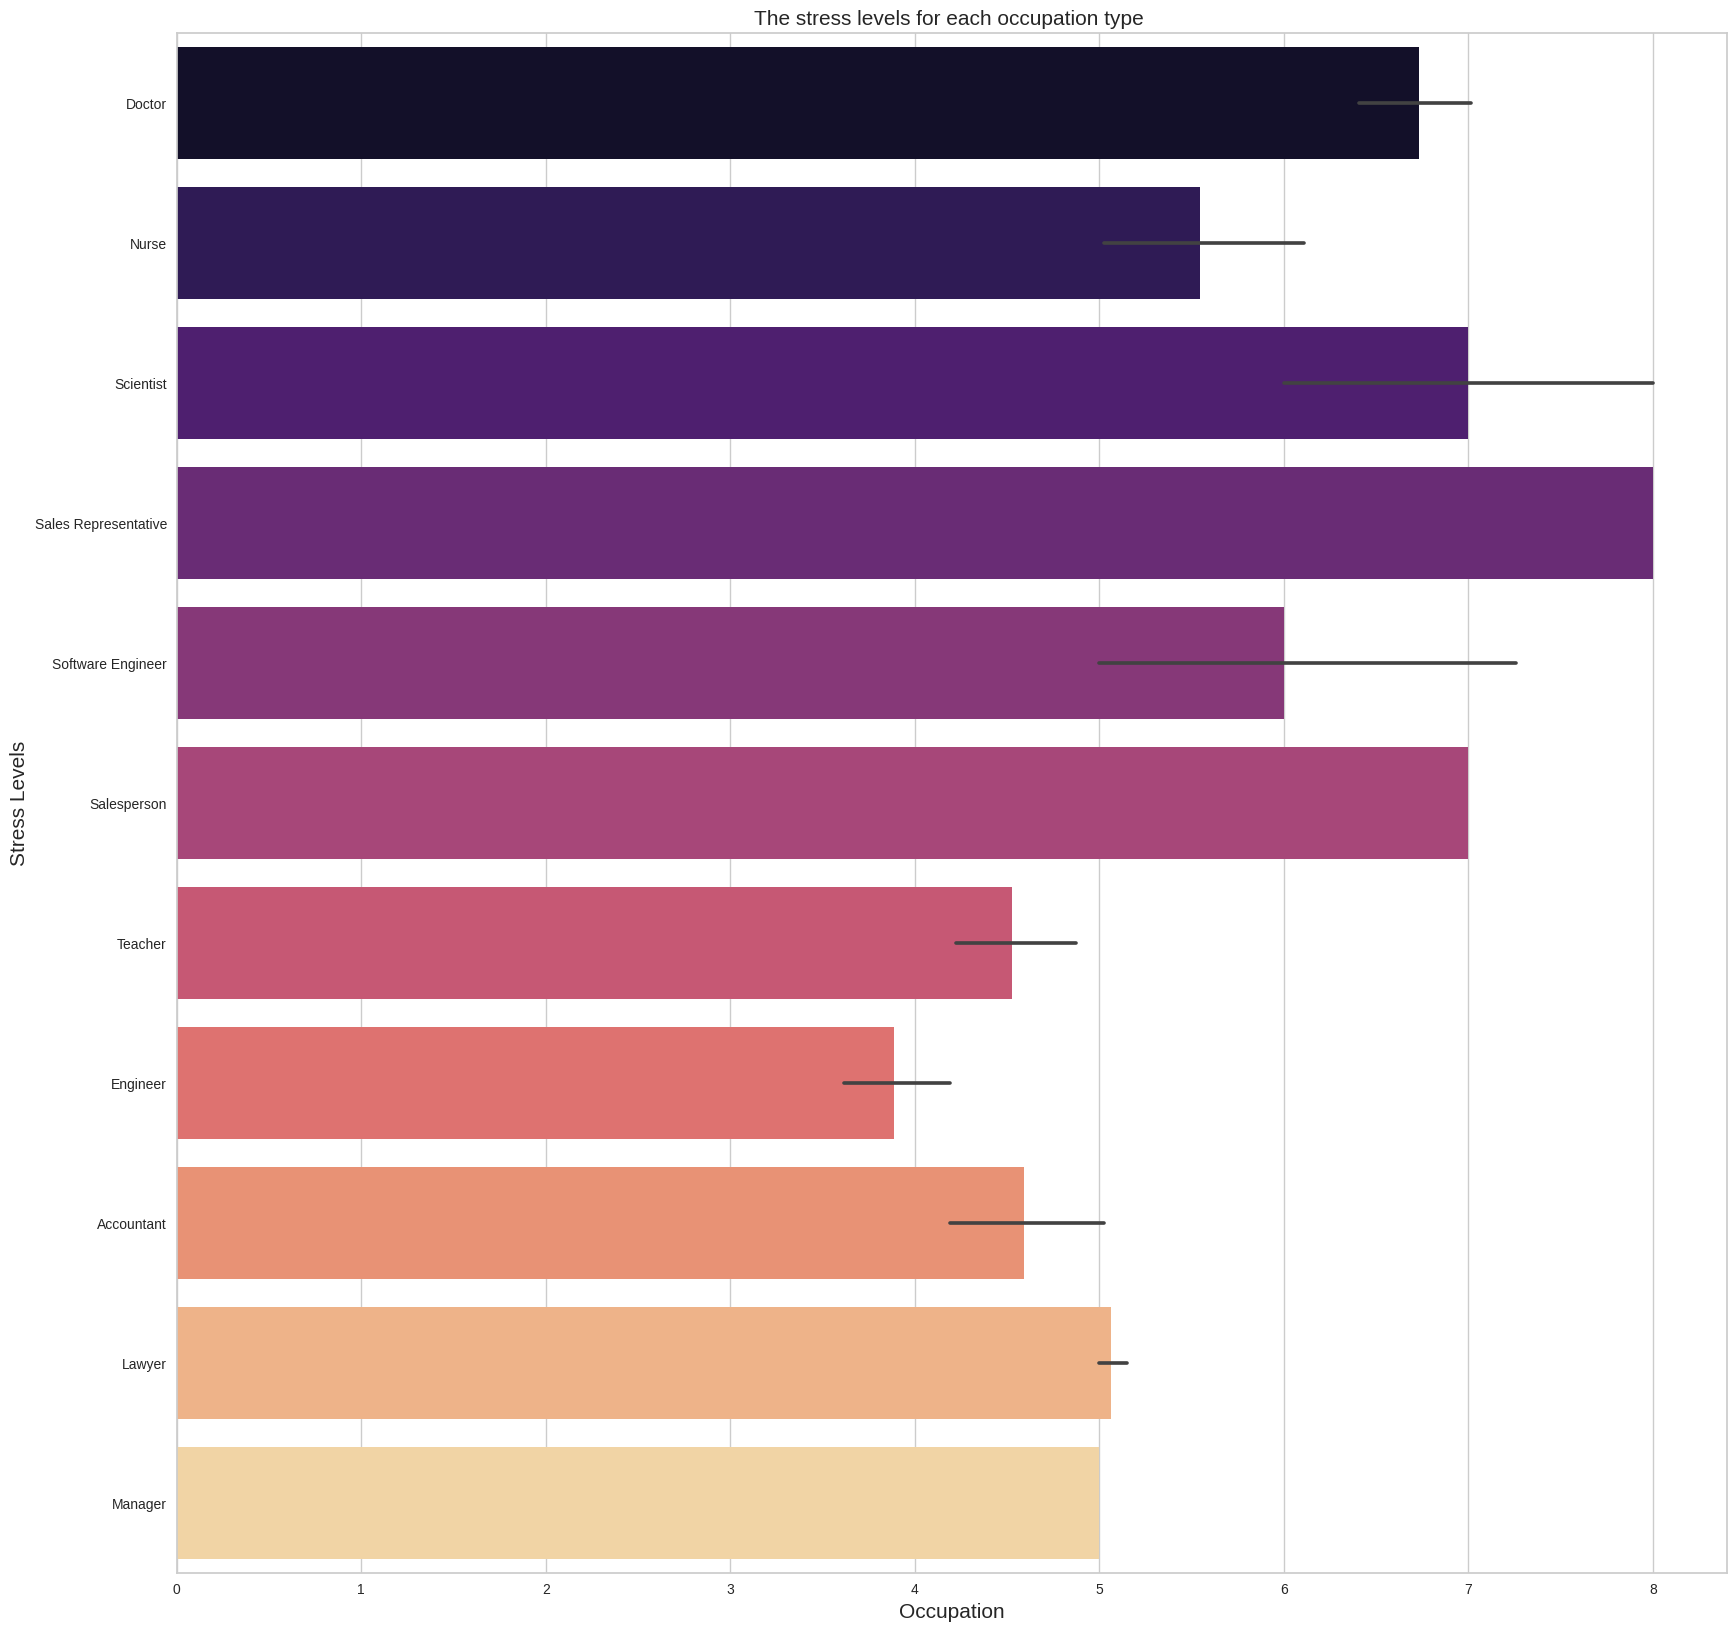

In [ ]:
data = df.sort_values(['Stress Level'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=data["Stress Level"],y=data["Occupation"], palette="magma")
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Stress Levels",fontsize=15)
plt.title("The stress levels for each occupation type ",fontsize=15)
plt.show()


**Doctors were not found to have the highest stress levels in the dataset. Instead, Sales Representatives, Salespersons, and Scientists ranked highest in stress levels.**

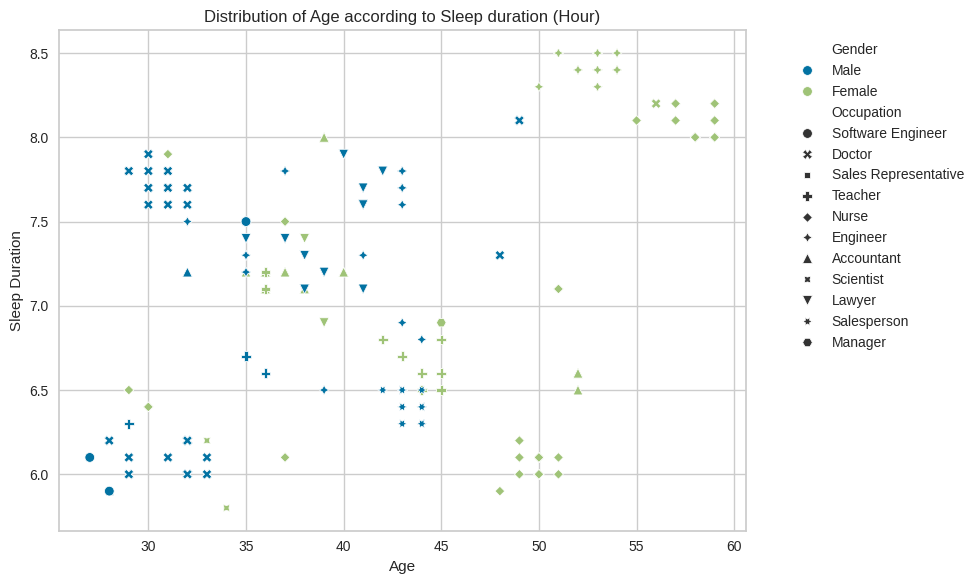

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Gender', style='Occupation', marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution of Age according to Sleep duration (Hour)')
plt.tight_layout()
plt.show()

**Distribution of Age according to Sleep duration (Hour)**

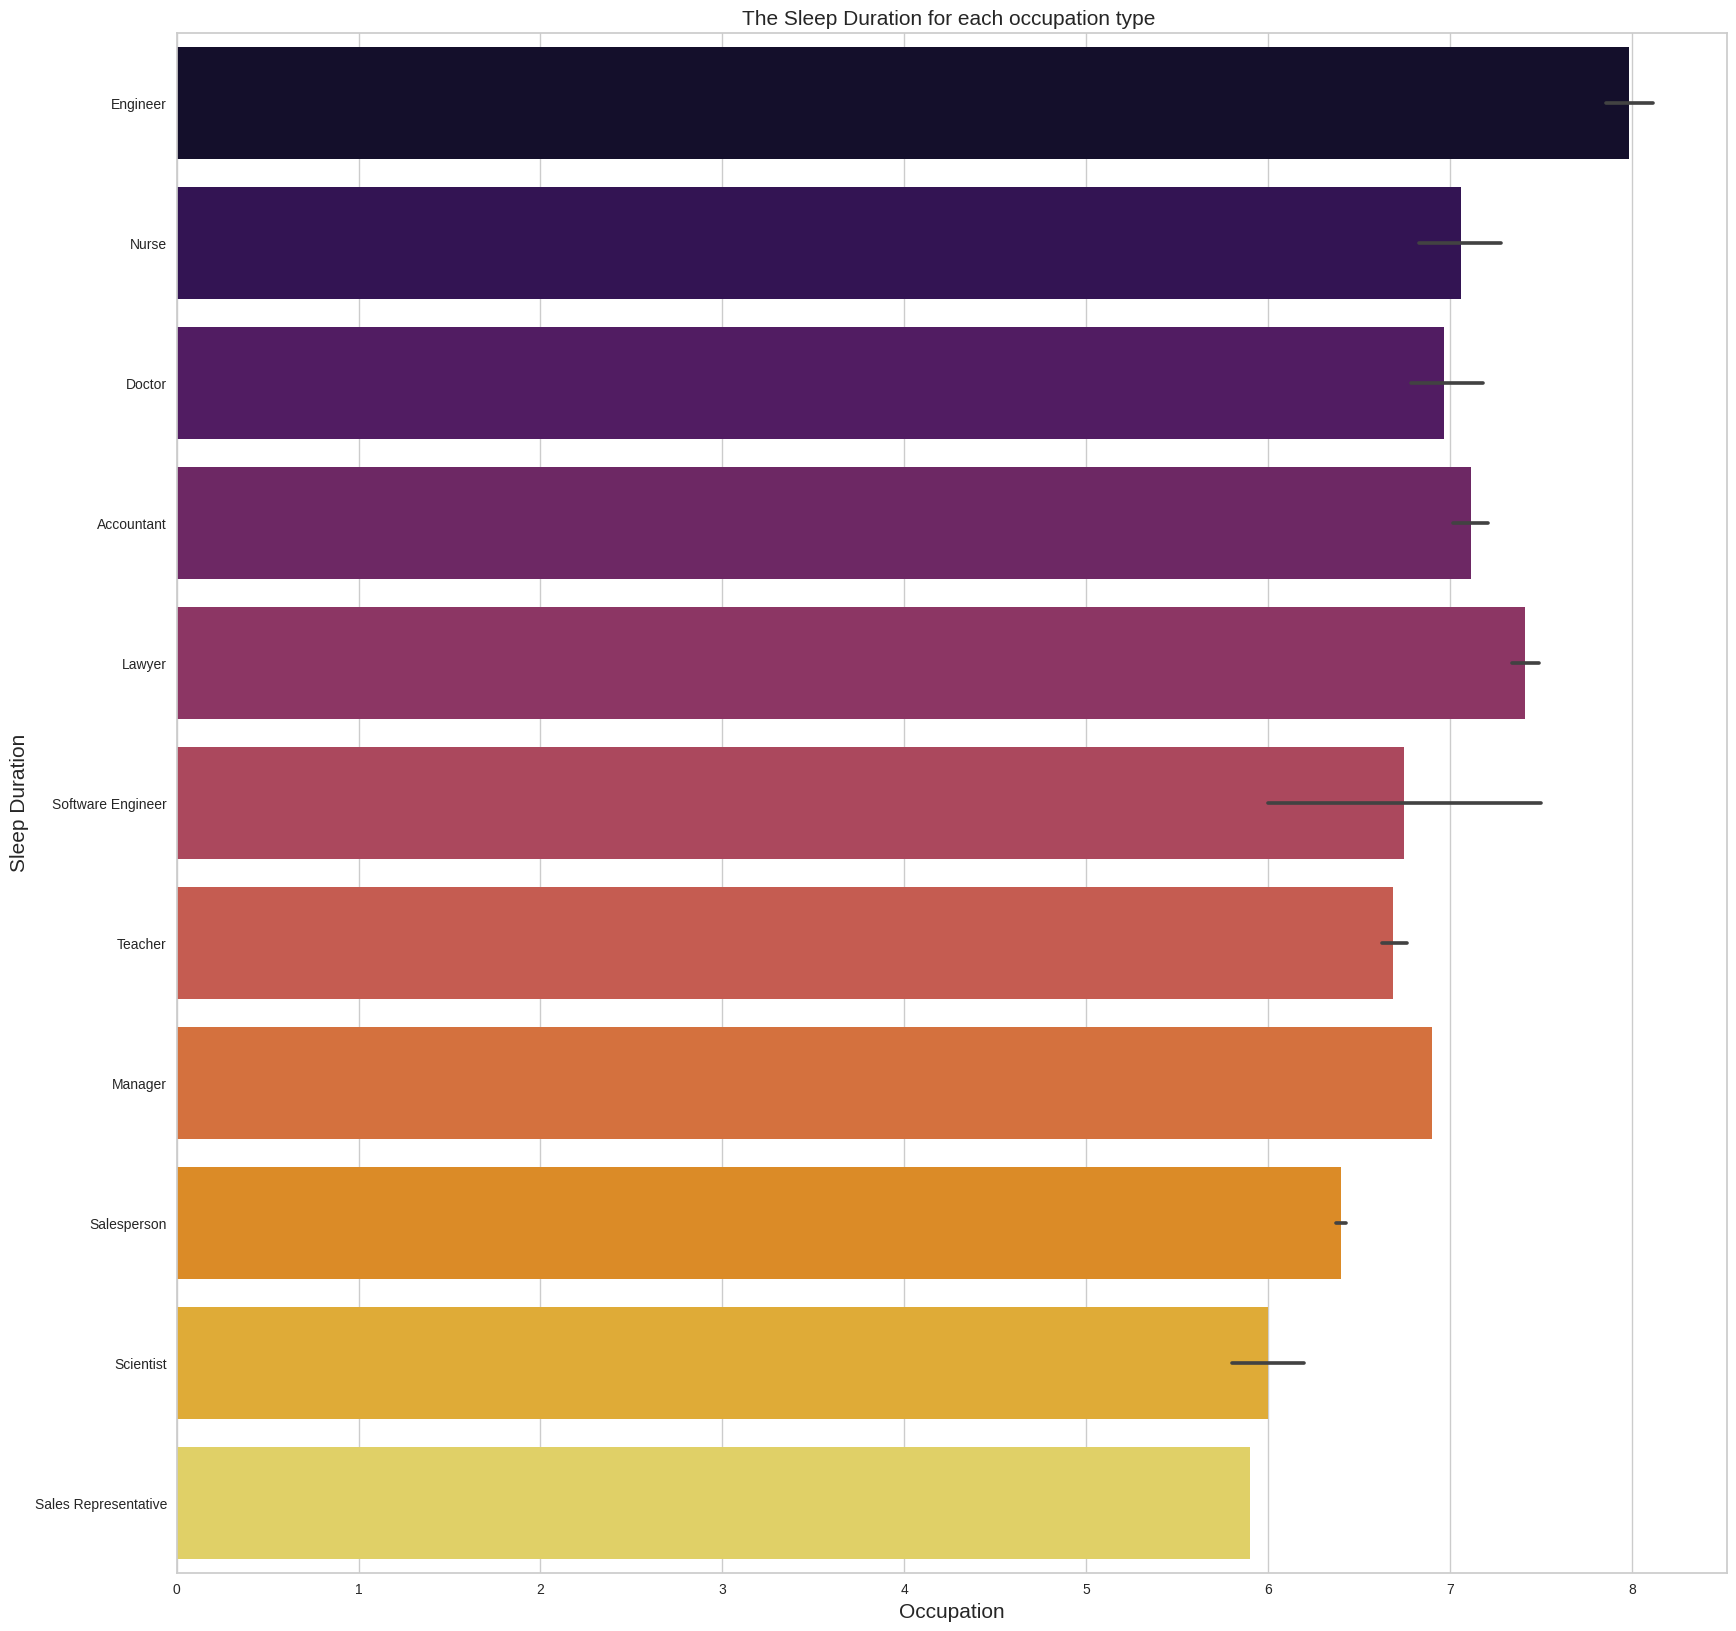

In [ ]:
data = df.sort_values(['Sleep Duration'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=data["Sleep Duration"],y=data["Occupation"],palette="inferno")
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Sleep Duration",fontsize=15)
plt.title("The Sleep Duration for each occupation type ",fontsize=15)
plt.show()


**It was also observed that Sales Representatives, Salespersons, and Scientists are among the occupation types with the shortest sleep duration, indicating a potential correlation between high stress levels and reduced sleep duration.**

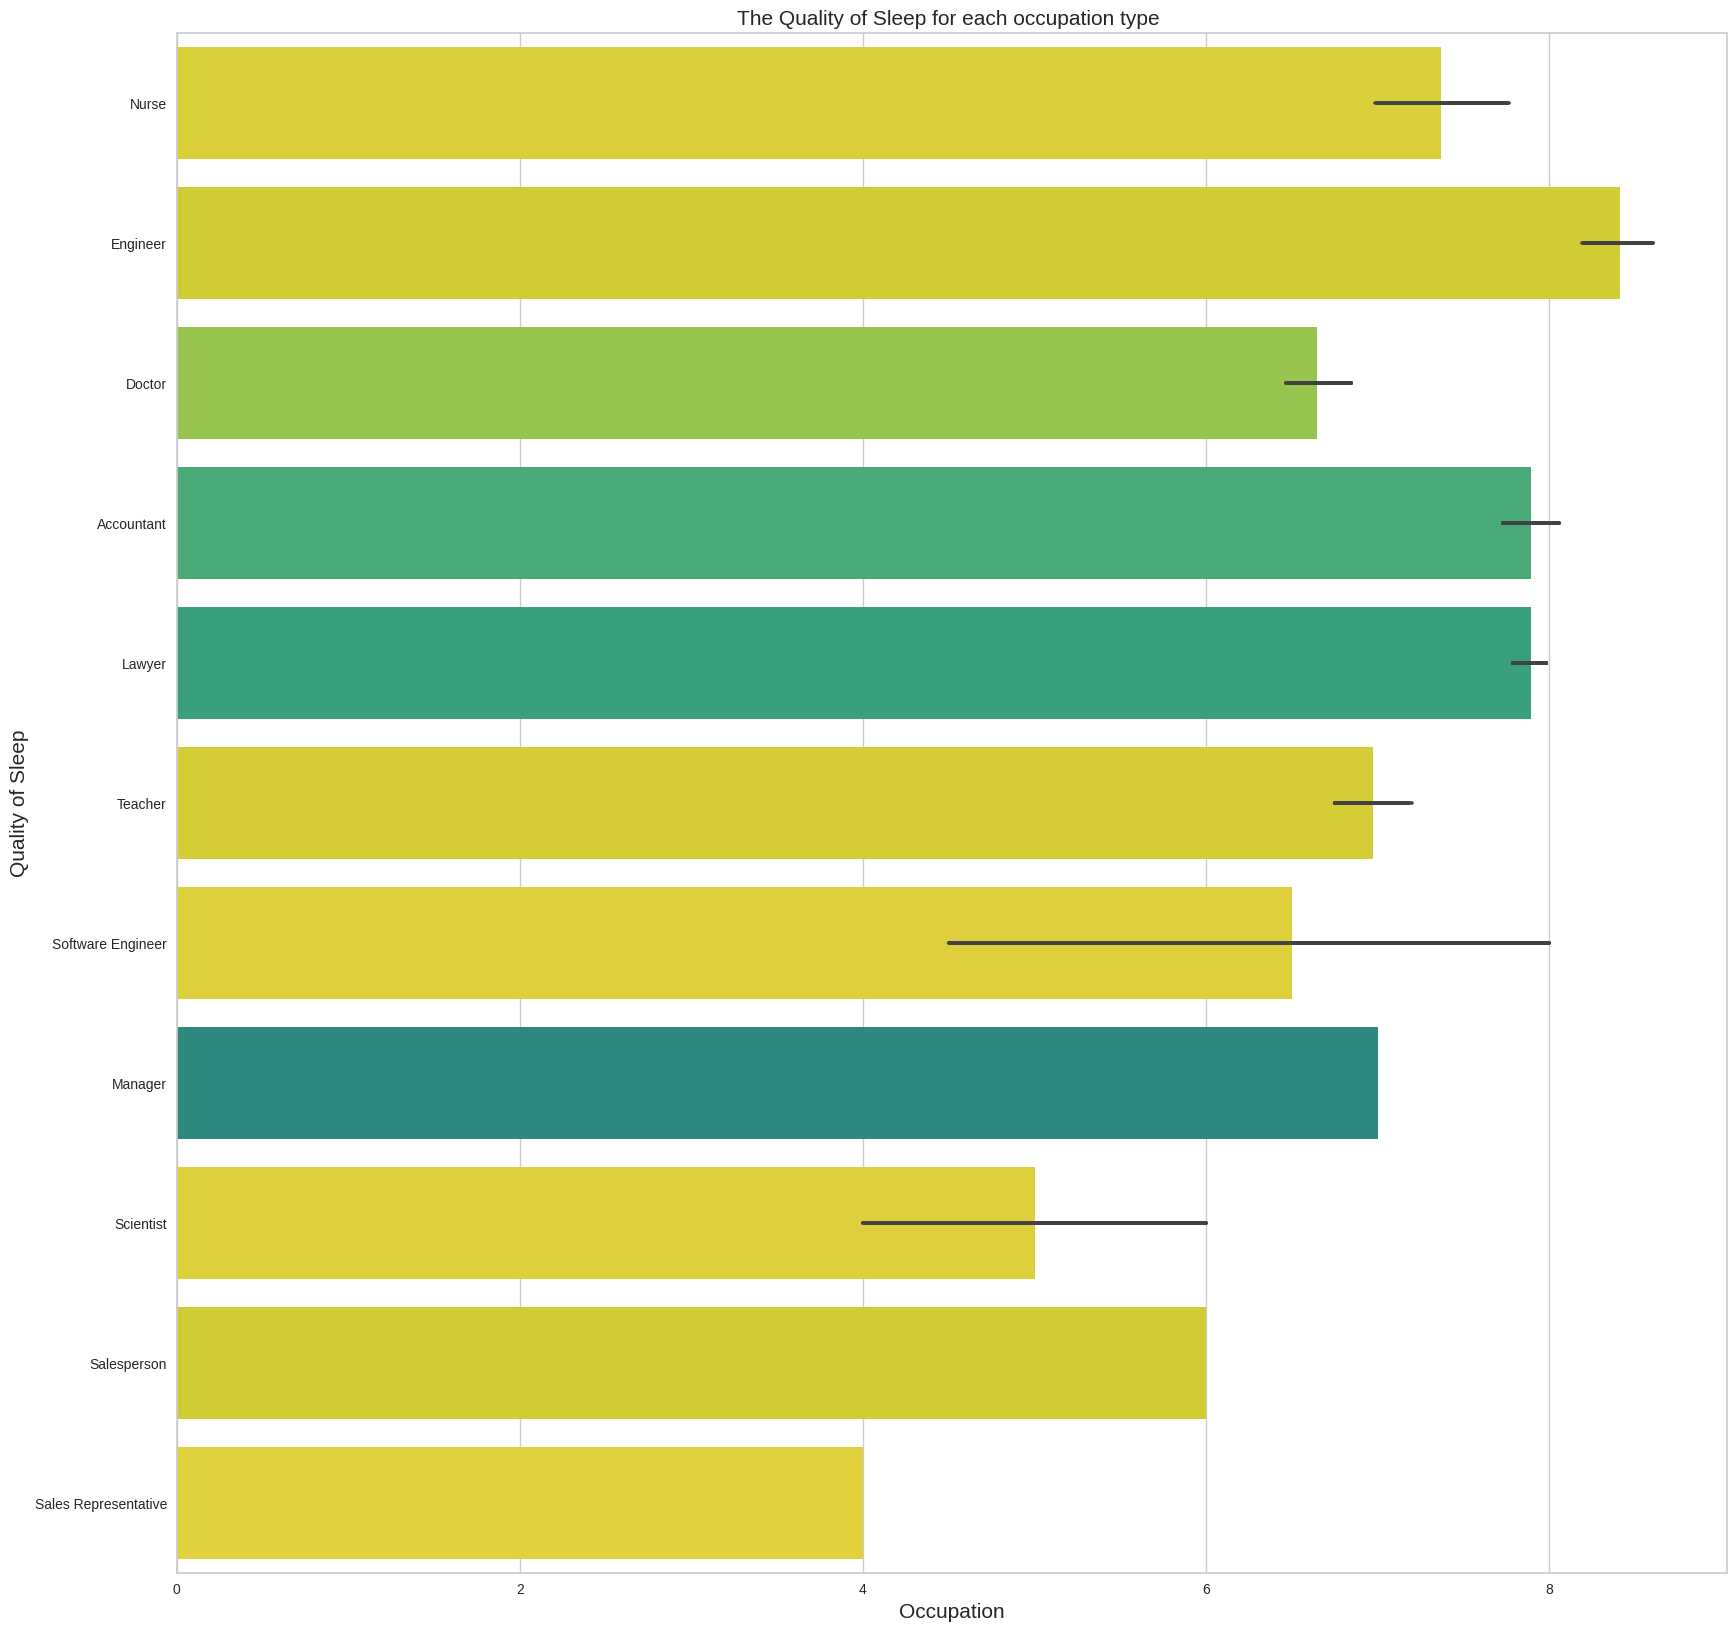

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x='Quality of Sleep', y='Occupation', data=df, order=df.sort_values('Quality of Sleep', ascending=False)['Occupation'], palette="viridis")
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Quality of Sleep",fontsize=15)
plt.title("The Quality of Sleep for each occupation type ",fontsize=15)
plt.show()

**Furthermore, Sales Representatives, Salespersons, and Scientists have been noted to experience the lowest quality of sleep, in contrast to Engineers, Accountants, and Lawyers, who demonstrate the highest sleep quality. This implies a plausible association between heightened stress levels and compromised sleep quality.**

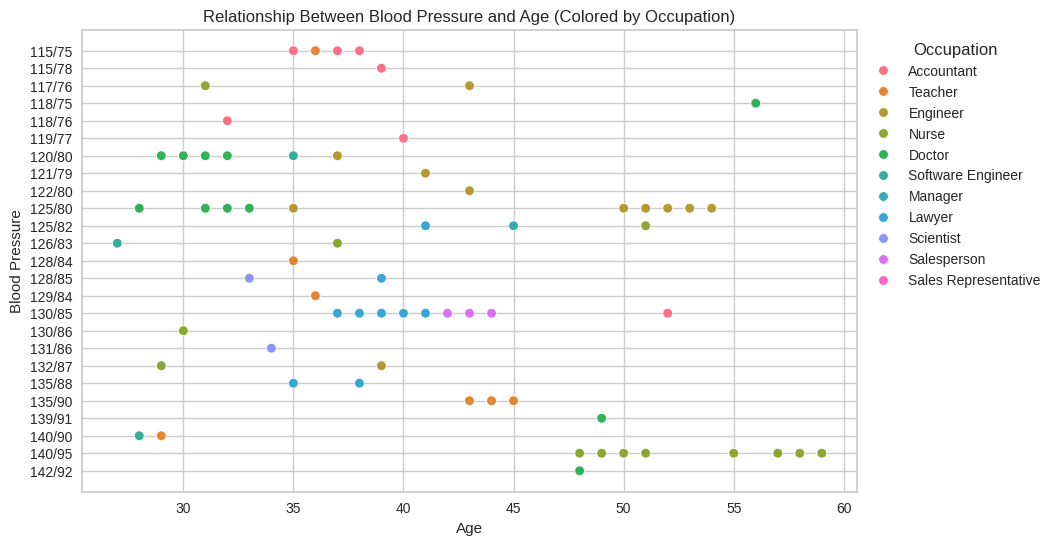

In [ ]:
df.sort_values(by='Blood Pressure', inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Blood Pressure', hue='Occupation', palette="husl")
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Relationship Between Blood Pressure and Age (Colored by Occupation)')
plt.legend(title='Occupation', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

**The distribution of blood pressure values varies with age across different occupations. Individuals working as accountants and teachers, aged between 30 and 40, exhibit the highest blood pressure levels. Conversely, nurses and doctors, aged between 50 and 60, demonstrate the lowest blood pressure levels.**

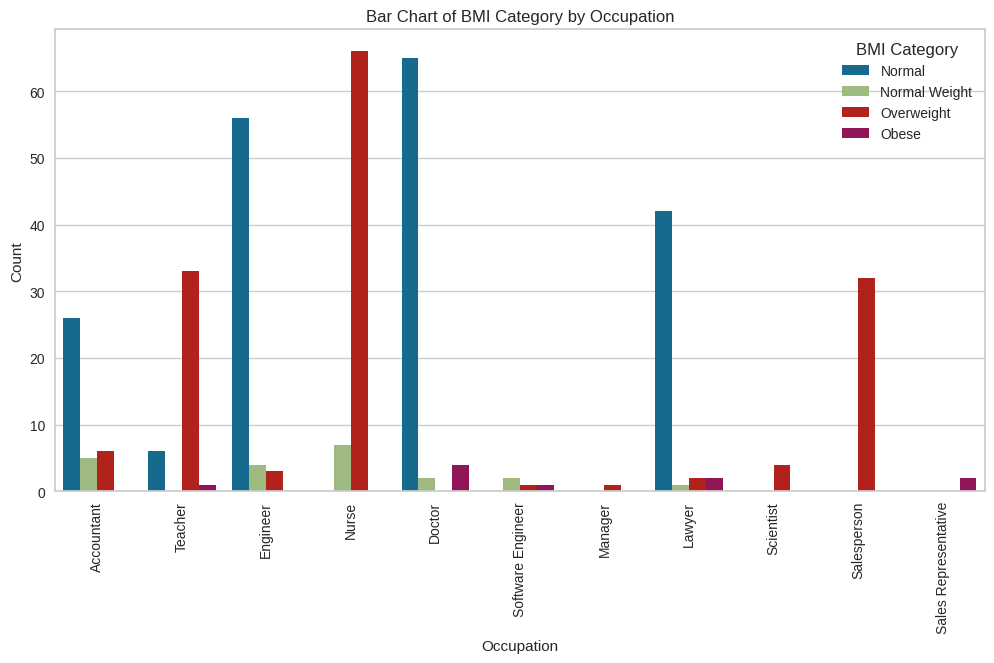

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="Occupation", hue="BMI Category")
plt.title("Bar Chart of BMI Category by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="BMI Category")
plt.show()

**The distribution of BMI categories varies across different occupations. Nurses exhibit the highest proportion of overweight BMI category, while doctors and engineers have the highest number of individuals falling into the normal BMI category.**

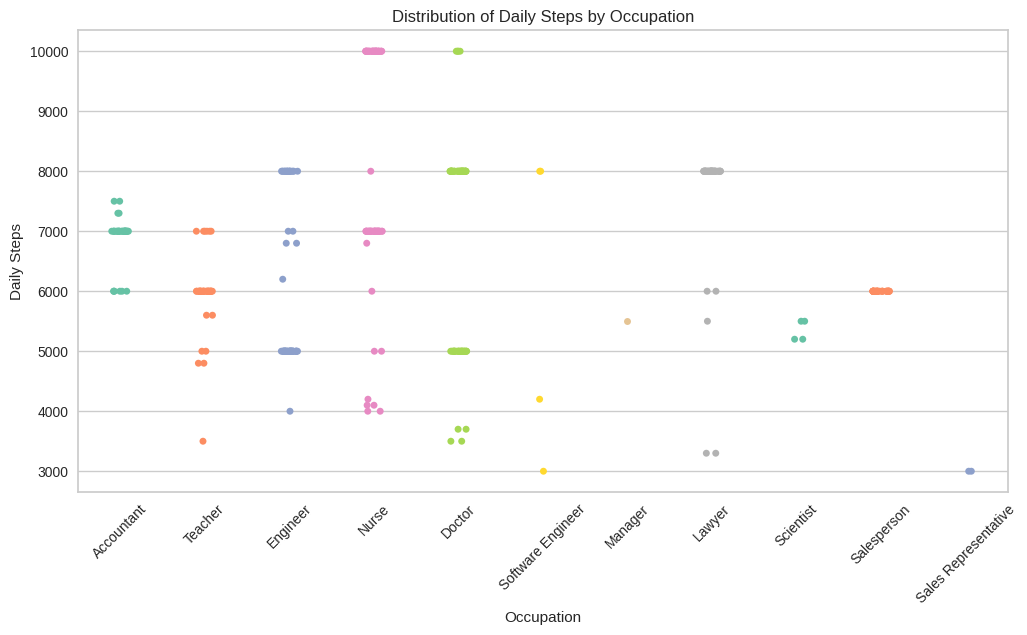

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Occupation', y='Daily Steps', data=df ,palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Daily Steps')
plt.title('Distribution of Daily Steps by Occupation')
plt.show()

**A disparity in daily step counts among various occupations was observed. Nurses and doctors registered the highest daily step counts, while sales representatives recorded the lowest number of daily steps.**

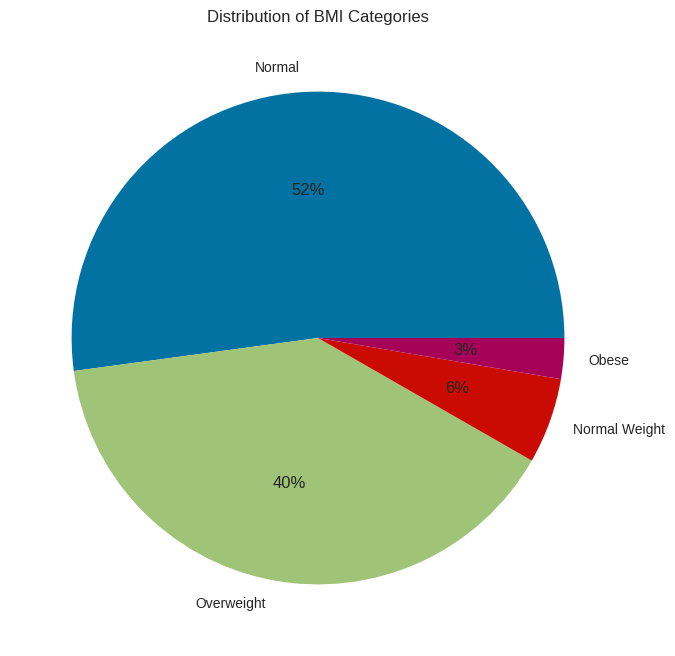

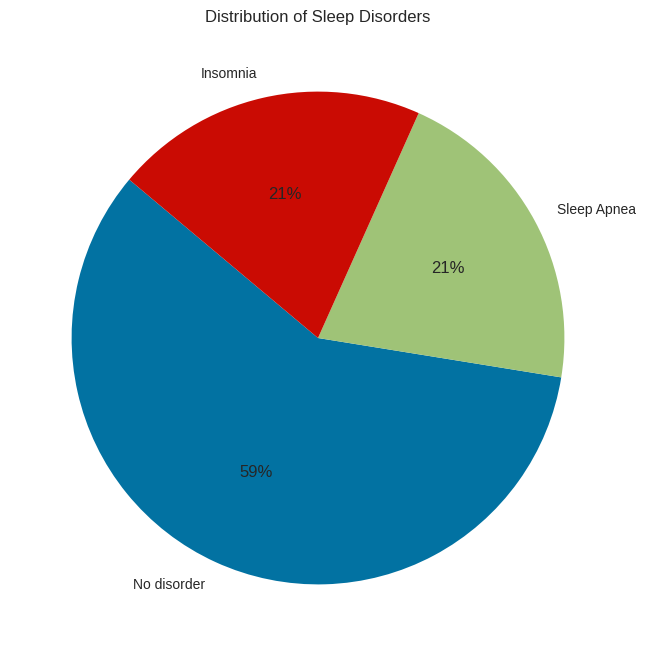

In [ ]:
bmi_counts = df['BMI Category'].value_counts()
sleep_disorder_counts = df['Sleep Disorder'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%.0f%%')
plt.title('Distribution of BMI Categories')
plt.show()



plt.figure(figsize=(8, 8))
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Sleep Disorders')
plt.show()

**Distribution of BMI categories and Sleep Disorder**

****

# **Encoding Objects**

In [ ]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
cols=['Gender','Occupation','BMI Category','Blood Pressure','Sleep Disorder']
for i in cols:
  df[i]=label_encoding.fit_transform(df[i])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 136 to 264
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    int64  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 38.0 KB


In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
136,0,38,0,7.1,8,60,4,0,0,68,7000,1
142,0,38,0,7.1,8,60,4,0,0,68,7000,1
140,0,38,0,7.1,8,60,4,0,0,68,7000,1
138,0,38,0,7.1,8,60,4,0,0,68,7000,1
85,0,35,0,7.2,8,60,4,0,0,68,7000,1


## **Duplicates**

In [ ]:
print(df.duplicated().sum())

242


In [ ]:
#df.drop_duplicates(inplace = True)
# Models are observed to learn from duplicates, keeping them boosts overall accuracy

## **Correlation**

In [ ]:
df.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,-0.176272,0.217105,-0.014509,-0.253415
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,0.572813,-0.225606,0.057973,0.232000
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.546791,0.043928,-0.105877,-0.169800
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.191704,-0.516455,-0.039533,0.177552
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.147769,-0.659865,0.016791,0.179592
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.271913,0.136971,0.772723,0.433214
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.117545,0.670026,0.186829,-0.036058
BMI Category,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.724217,0.295585,-0.005059,0.016573
Blood Pressure,-0.176272,0.572813,0.546791,-0.191704,-0.147769,0.271913,0.117545,0.724217,1.000000,0.288300,0.119455,0.197906
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.295585,0.288300,1.000000,-0.030309,0.205987


<Axes: >

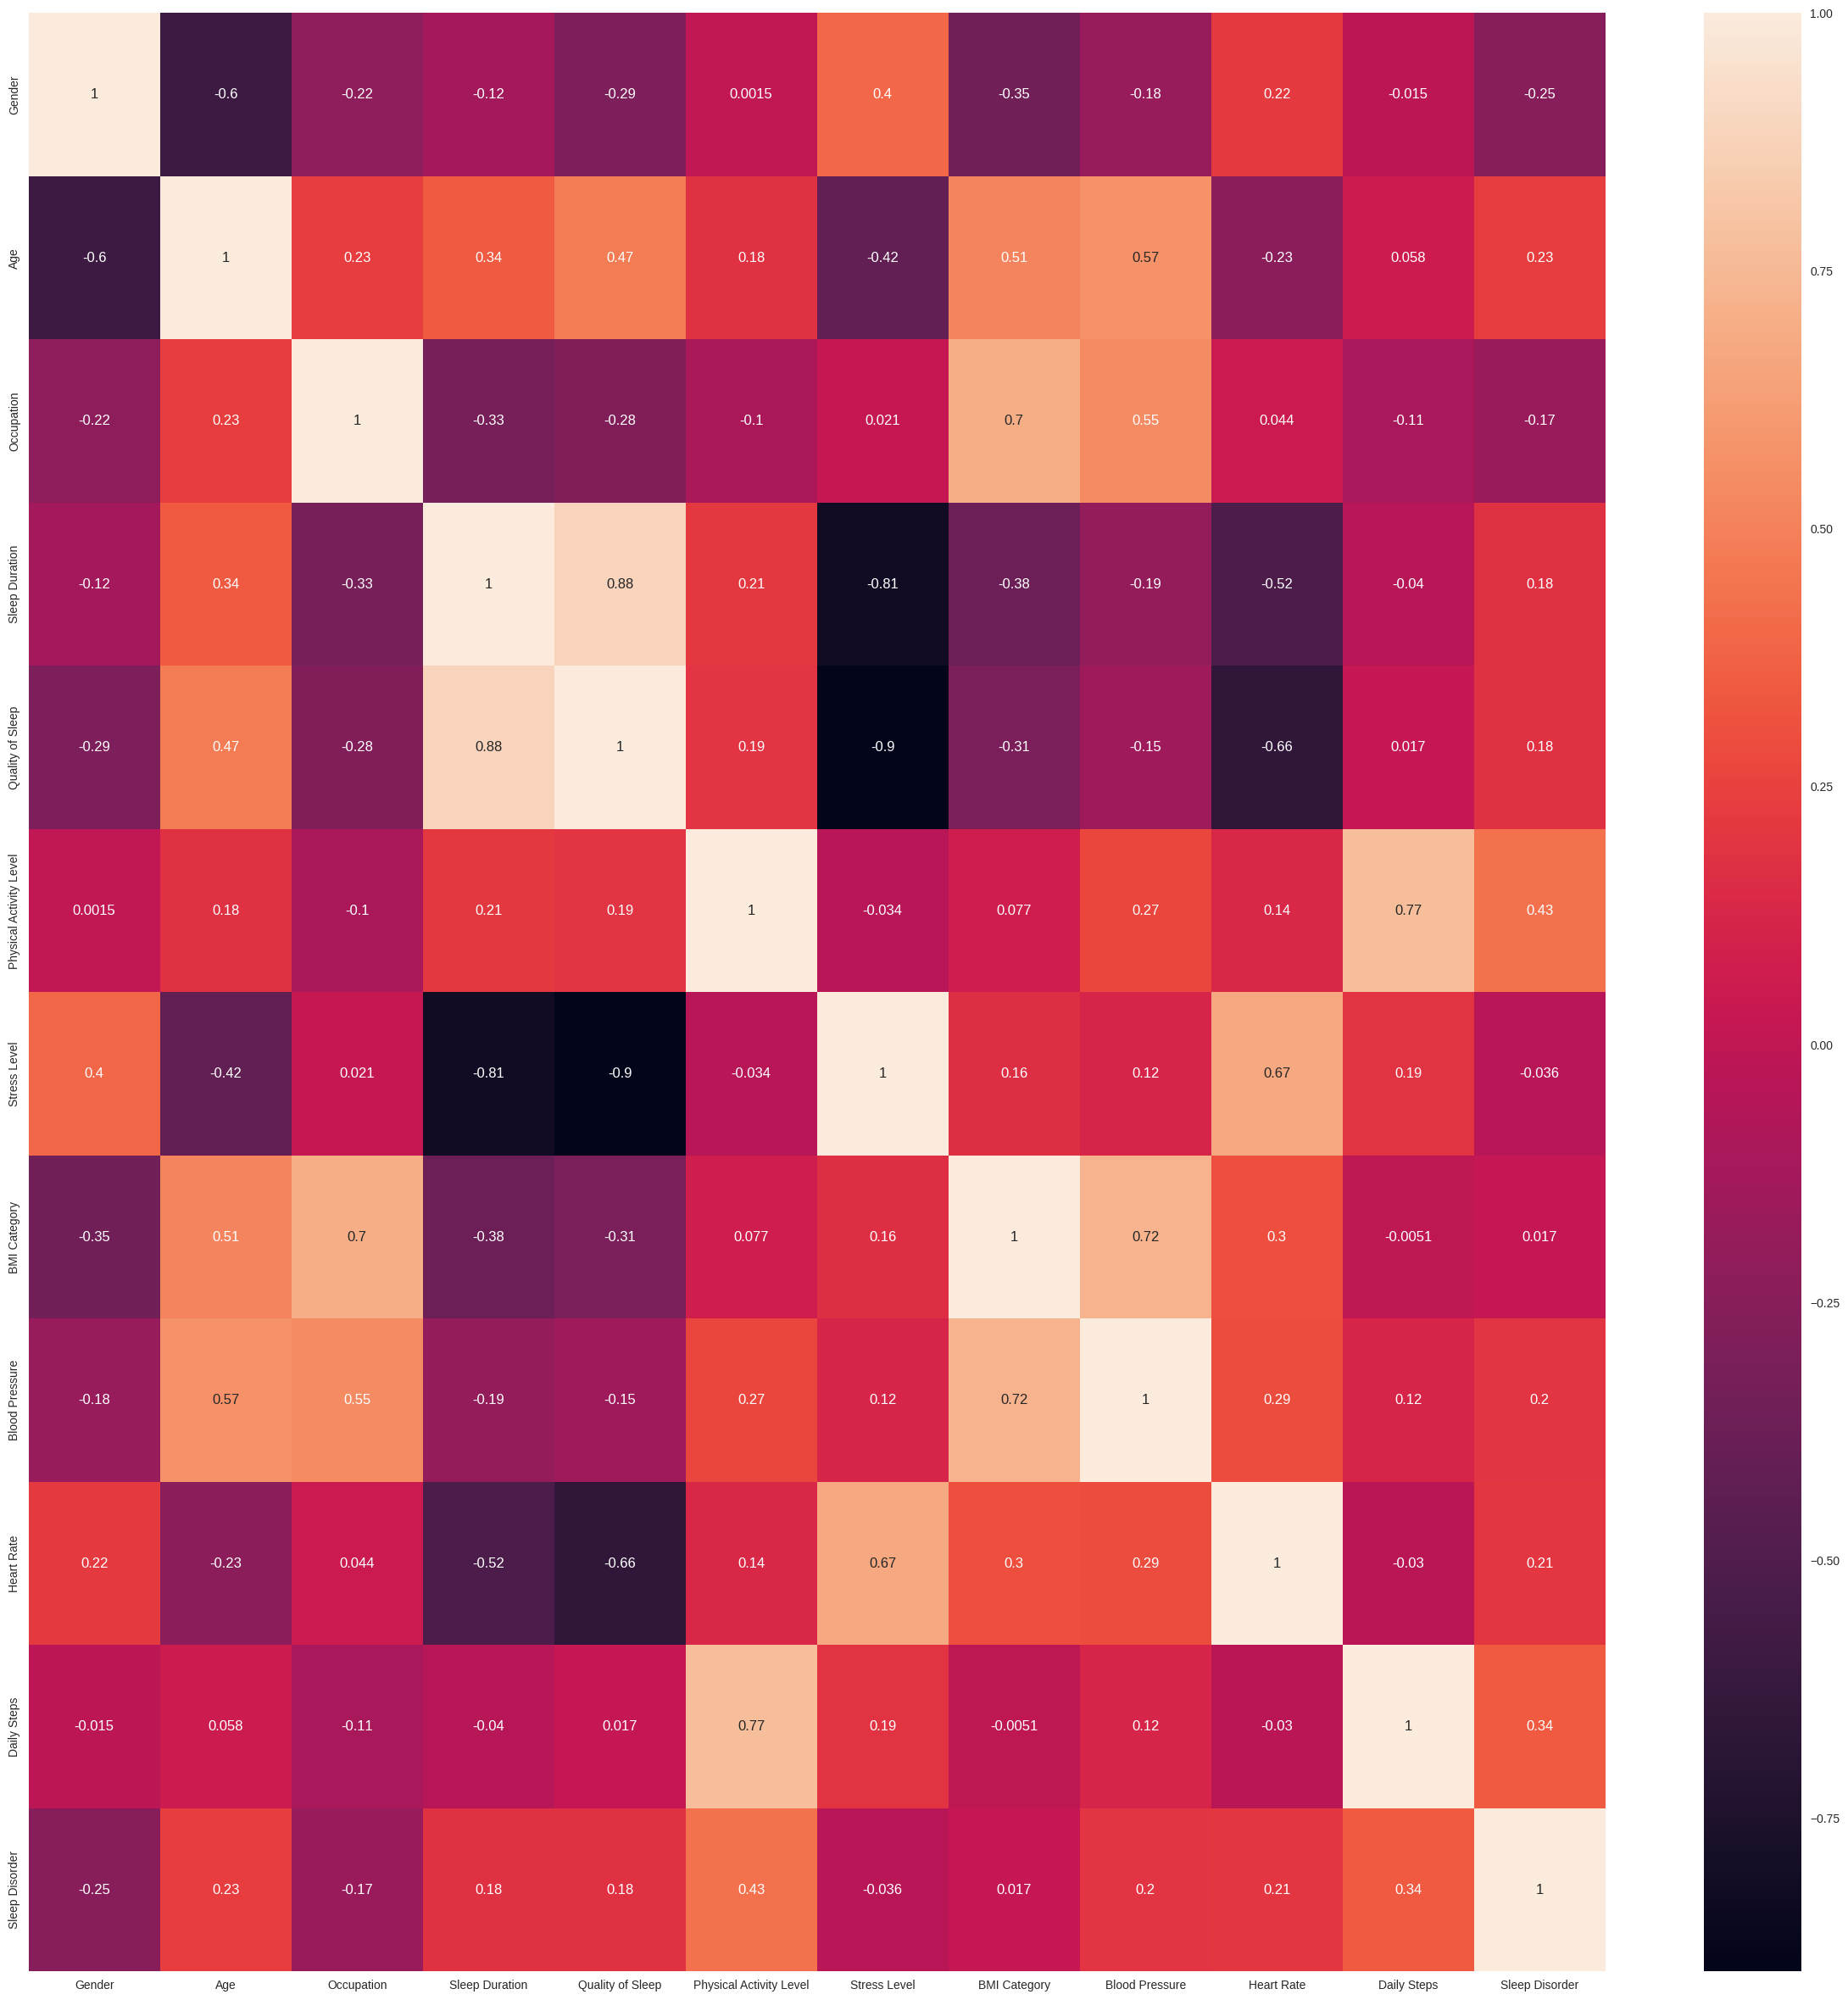

In [ ]:
#making correlation on the data
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(),annot = True, ax =ax)

## **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaling data in range of 0 to 1
scaler = MinMaxScaler()

In [ ]:
# scale Integer values
cols = ['Daily Steps','Age','Physical Activity Level','Heart Rate', 'Quality of Sleep']
for col in cols:
  df[col]= scaler.fit_transform(df[[col]])

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
136,0,0.34375,0,7.1,0.8,0.5,4,0,0,0.142857,0.571429,1
142,0,0.34375,0,7.1,0.8,0.5,4,0,0,0.142857,0.571429,1
140,0,0.34375,0,7.1,0.8,0.5,4,0,0,0.142857,0.571429,1
138,0,0.34375,0,7.1,0.8,0.5,4,0,0,0.142857,0.571429,1
85,0,0.25000,0,7.2,0.8,0.5,4,0,0,0.142857,0.571429,1


# **✅MODEL Building:**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## ***`Sleep Disorder Classification`***

In [ ]:
sleep_x = df.drop('Sleep Disorder', axis = 1)
sleep_y = df['Sleep Disorder']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(sleep_x,sleep_y, test_size = 0.275, random_state = 42)

#### **Logistic Regression**

In [ ]:
#Define object from Logistic class
#same set of random numbers will be generated every time you run the code.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state = 42)

In [ ]:
#predict test data
LogReg.fit(x_train, y_train)
y_prd_log1 = LogReg.predict(x_train)
y_prd_log2 = LogReg.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_prd_log1,y_train))
print("Test Accuracy:",metrics.accuracy_score(y_prd_log2,y_test))

Train Accuracy: 0.8856088560885609
Test Accuracy: 0.9029126213592233


### ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc1=[]
acc2=[]
for i in range (1,16):
  dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dtc1.fit(x_train,y_train)
  dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dtc2.fit(x_train,y_train)
  acc1.append(dtc1.score(x_test, y_test))
  acc2.append(dtc2.score(x_test, y_test))

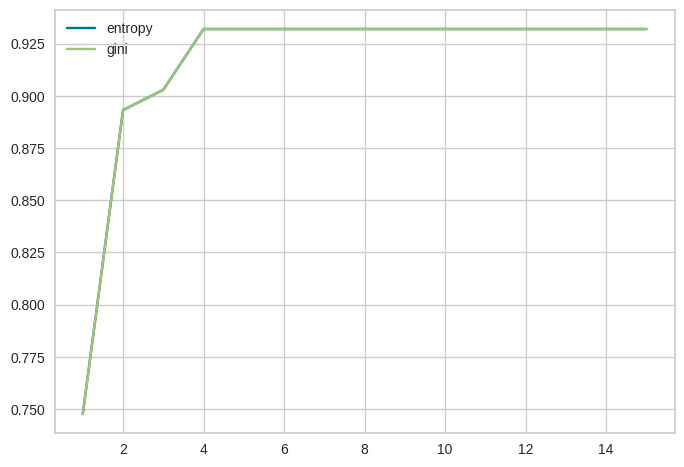

In [ ]:
plt.plot(range(1,16),acc1,label="entropy")
plt.plot(range(1,16),acc2,label="gini")
plt.legend()

In [ ]:
decisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 42)
decisionTree.fit(x_train, y_train)
print(decisionTree.score(x_train, y_train) * 100)

91.14391143911439


In [ ]:
decisionTree.fit(x_train, y_train)
Y_prd_dt1=decisionTree.predict(x_train)
Y_prd_dt2=decisionTree.predict(x_test)
print("Train Accuracy",metrics.accuracy_score(Y_prd_dt1,y_train))
print("Test Accuracy",metrics.accuracy_score(Y_prd_dt2,y_test))

Train Accuracy 0.9114391143911439
Test Accuracy 0.9320388349514563


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc1=[]
acc2=[]
for i in range (2,16):
  rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
  rf1.fit(x_train,y_train)
  rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
  rf2.fit(x_train,y_train)
  acc1.append(rf1.score(x_test, y_test))
  acc2.append(rf2.score(x_test, y_test))

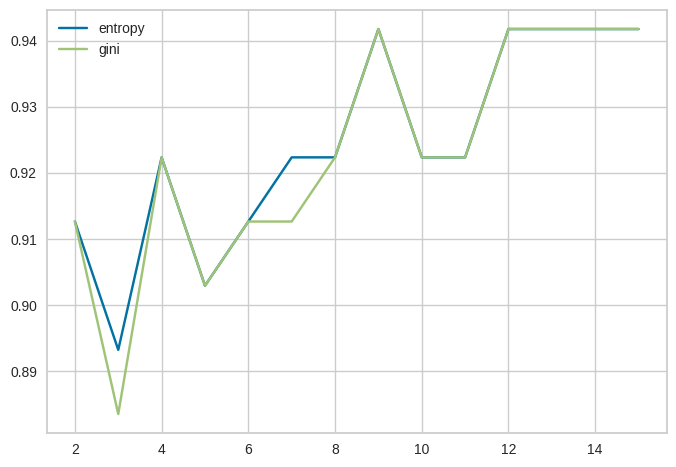

In [ ]:
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()

In [ ]:
rf = RandomForestClassifier(n_estimators = 9, criterion = 'gini', random_state = 42)
rf.fit(x_train, y_train)
print(rf.score(x_test,y_test))

0.941747572815534


In [ ]:
#predict test data
rf.fit(x_train, y_train)
Y_prd_rf1 = rf.predict(x_train)
Y_prd_rf2 = rf.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(Y_prd_rf1,y_train))
print("Test Accuracy:",metrics.accuracy_score(Y_prd_rf2,y_test))

Train Accuracy: 0.9261992619926199
Test Accuracy: 0.941747572815534


### **K-Nearest Neighbour**

In [ ]:
#2)knn
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (1,10,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(x_train,y_train)
    sc=knn.score(x_test, y_test)
    wss.append(sc)

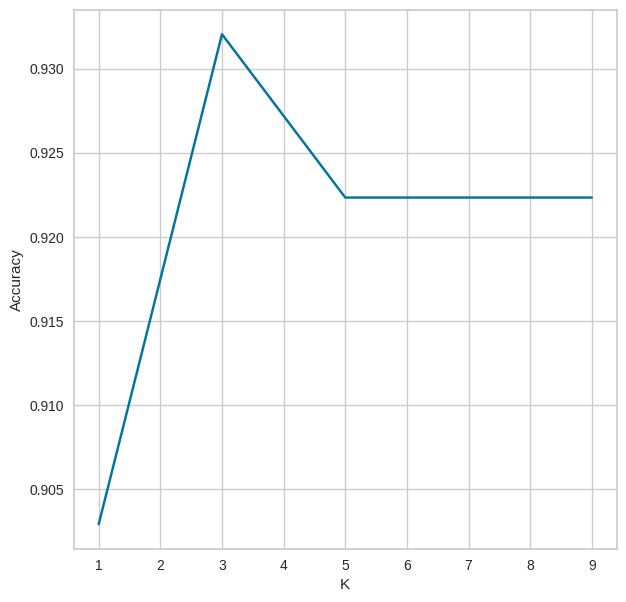

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(1,10,2),wss)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, x_train, y_train, cv=10,scoring="accuracy")
print(scores_knn.mean())

0.8855820105820106


In [ ]:
#predict test data
knn.fit(x_train, y_train)
Y_prd_knn1=knn.predict(x_train)
Y_prd_knn2=knn.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(Y_prd_knn1,y_train))
print("Test Accuracy:",metrics.accuracy_score(Y_prd_knn2,y_test))

Train Accuracy: 0.9188191881918819
Test Accuracy: 0.9320388349514563


### **Support Vector Machine**

In [ ]:
#Define object from svm class
#same set of random numbers will be generated every time you run the code.
from sklearn import svm
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', gamma='auto',random_state = 42)
svm_classifier.fit(x_train, y_train)
print(svm_classifier.score(x_train, y_train) * 100)

92.619926199262


In [ ]:
scores_svm = cross_val_score(svm_classifier, x_train, y_train, cv=10,scoring="accuracy")
print(scores_svm.mean())

0.9115079365079366


In [ ]:
#predict test data
svm_classifier.fit(x_train, y_train)
Y_prd_svm1=svm_classifier.predict(x_train)
Y_prd_svm2=svm_classifier.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(Y_prd_svm1,y_train))
print("Test Accuracy:",metrics.accuracy_score(Y_prd_svm2,y_test))

Train Accuracy: 0.9261992619926199
Test Accuracy: 0.941747572815534


### **XGBoost**

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

0.941747572815534


In [ ]:
scores_xg = cross_val_score(model, x_train, y_train, cv=10,scoring="accuracy")
print(scores_xg.mean())

0.8892857142857142


In [ ]:
#predict test data
model.fit(x_train, y_train)
Y_prd_xg1=rf.predict(x_train)
Y_prd_xg2=rf.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(Y_prd_xg1,y_train))
print("Test Accuracy:",metrics.accuracy_score(Y_prd_xg2,y_test))

Train Accuracy: 0.9261992619926199
Test Accuracy: 0.941747572815534


### **Model Comparison:**

In [ ]:
#creating a dataframe to compare between the accuracy of each model
model={'models':['Logistic Regression','KNN','Desicion Tree', 'Random Forest', 'SVM','XGboost'],'accuracy':[metrics.accuracy_score(y_test,y_prd_log2),metrics.accuracy_score(y_test,Y_prd_knn2),metrics.accuracy_score(y_test,Y_prd_dt2),metrics.accuracy_score(y_test,Y_prd_rf2),metrics.accuracy_score(y_test,Y_prd_svm2),metrics.accuracy_score(y_test,Y_prd_xg2)]}
model_df=pd.DataFrame(model)
model_df

,models,accuracy
0,Logistic Regression,0.902913
1,KNN,0.932039
2,Desicion Tree,0.932039
3,Random Forest,0.941748
4,SVM,0.941748
5,XGboost,0.941748


## ***`Stress Level Classification`***

In [ ]:
stress_x= df.drop('Stress Level', axis = 1)
stress_y= df['Stress Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(stress_x,stress_y, test_size = 0.25, random_state = 0)

#### **1)LOGISTIC REGRESSION :**

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg1 = LogisticRegression(random_state =0)

In [ ]:
scores_log = cross_val_score(LogReg1, X_train, Y_train, cv=10,scoring="accuracy")
print(scores_log.mean())

0.8571428571428571


In [ ]:
LogReg1.fit(X_train, Y_train)
y_prd_logtr=LogReg1.predict(X_train)
y_prd_logts=LogReg1.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_prd_logtr,Y_train))
print("Accuracy",metrics.accuracy_score(y_prd_logts,Y_test))

Accuracy 0.875
Accuracy 0.851063829787234


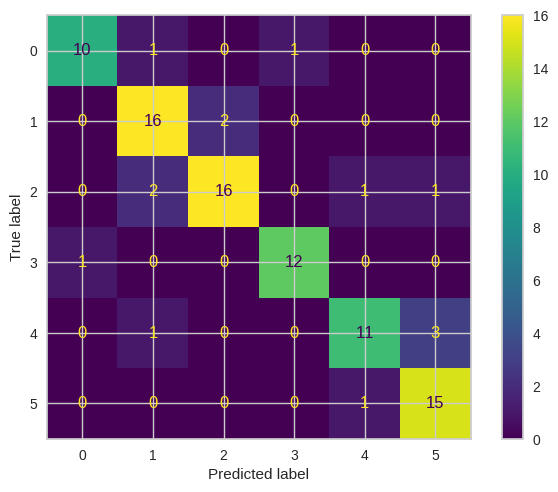

In [ ]:
#Confusion metrix
cm=confusion_matrix(Y_test,y_prd_logts)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
y_pred = LogReg1.predict(X_test)
class_report=classification_report(Y_test, y_pred)
print(class_report)
accuracy_score(Y_test, y_pred)

              precision    recall  f1-score   support

           3       0.91      0.83      0.87        12
           4       0.80      0.89      0.84        18
           5       0.89      0.80      0.84        20
           6       0.92      0.92      0.92        13
           7       0.85      0.73      0.79        15
           8       0.79      0.94      0.86        16

    accuracy                           0.85        94
   macro avg       0.86      0.85      0.85        94
weighted avg       0.86      0.85      0.85        94



0.851063829787234

#### **2) K NEAREST NEIGHBOR :**

In [ ]:
arr=[]
for k in range (3,16,2):
    model2= KNeighborsClassifier(n_neighbors=k)
    model2=model2.fit(X_train,Y_train)
    s=model2.score(X_test, Y_test)
    arr.append(s)

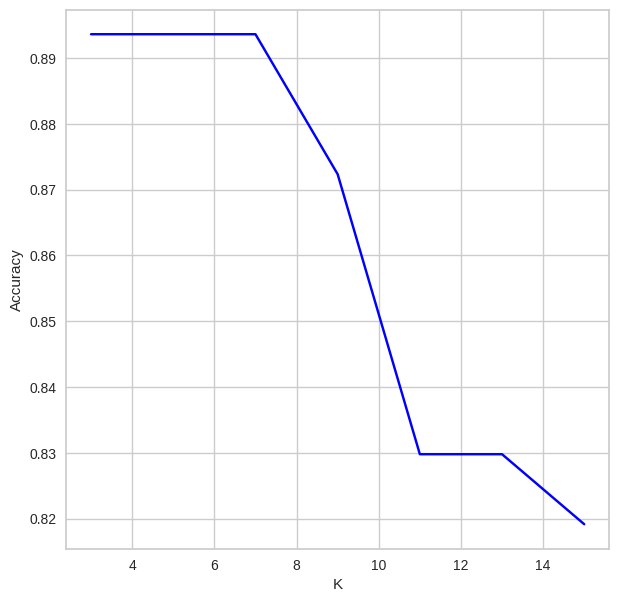

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),arr,color='blue')

In [ ]:
model2= KNeighborsClassifier(n_neighbors=7)

In [ ]:
model2.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred2tr = model2.predict(X_train)
y_pred2ts = model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(Y_train,y_pred2tr)}")
print(f"Accuracy = {accuracy_score(Y_test,y_pred2ts)}")

Accuracy = 0.9321428571428572
Accuracy = 0.8936170212765957


#### **3) DECISION TREE :**

In [ ]:
l1=[]
l2=[]
for i in range (1,16):
    dt1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dt1.fit(X_train,Y_train)
    dt2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dt2.fit(X_train,Y_train)
    l1.append(dt1.score(X_test, Y_test))
    l2.append(dt2.score(X_test, Y_test))

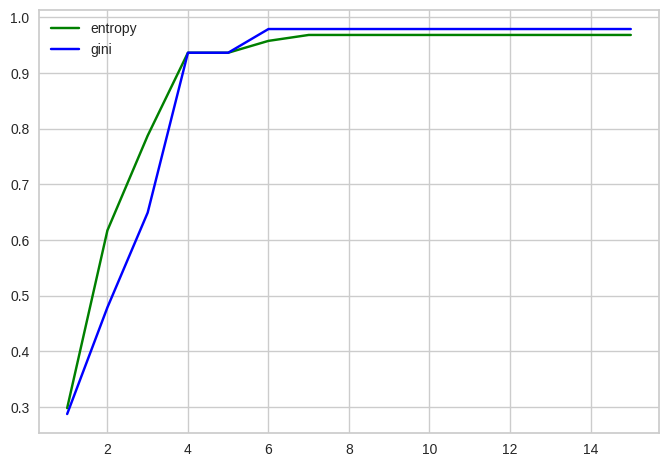

In [ ]:
plt.plot(range(1,16),l1,label="entropy",color='green')
plt.plot(range(1,16),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state = 42)

In [ ]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
y_pred3=model3.predict(X_test)

In [ ]:
print(f"Accuracy = {accuracy_score(Y_test,y_pred3)}")

Accuracy = 0.9361702127659575


#### **4) Random Forest :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
l1=[]
l2=[]
for i in range (1,22):
    rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
    rf1.fit(X_train,Y_train)
    rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
    rf2.fit(X_train,Y_train)
    l1.append(rf1.score(X_test, Y_test))
    l2.append(rf2.score(X_test, Y_test))

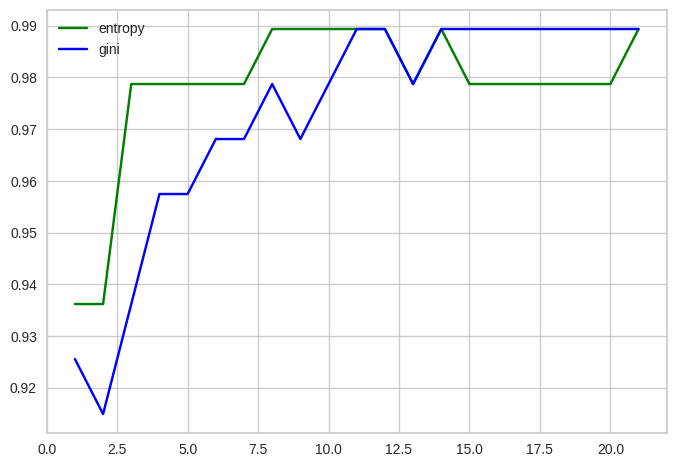

In [ ]:
plt.plot(range(1,22),l1,label="entropy",color='green')
plt.plot(range(1,22),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model4 = RandomForestClassifier(n_estimators = 15, criterion = 'gini', random_state = 42)

In [ ]:
model4.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [ ]:
y_pred4=model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(Y_test,y_pred4)}")

accuracy = 0.9893617021276596


In [ ]:
print("_"*50)
print(model4.score(X_train, Y_train))
print(model4.score(X_test, Y_test))

print("_"*50)

__________________________________________________
1.0
0.9893617021276596
__________________________________________________


In [ ]:
# confusion_matrix
plt.figure(figsize=(14,8))
Cm = confusion_matrix(Y_test,y_pred4)

<Figure size 1400x800 with 0 Axes>

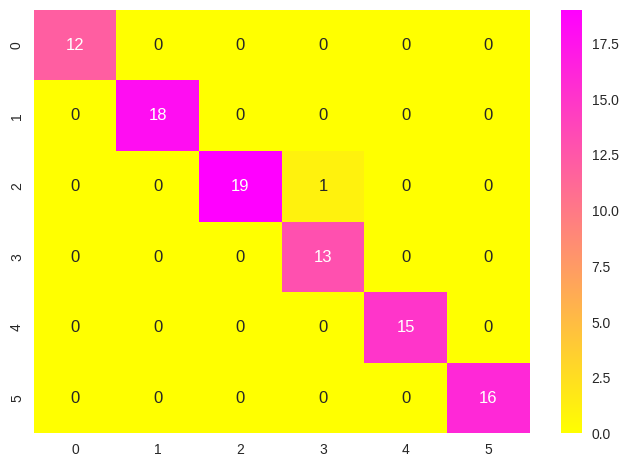

In [ ]:
sns.heatmap(Cm,annot=True, fmt="d", cmap="spring_r")
plt.show()

### **5) Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
svm_classifier2 = SVC(kernel='rbf', gamma='auto',random_state = 42)
svm_classifier2.fit(X_train, Y_train)
print(svm_classifier2.score(X_train, Y_train) * 100)

96.78571428571429


In [ ]:
scores_svm = cross_val_score(svm_classifier2, X_train, Y_train, cv=10,scoring="accuracy")
print(scores_svm.mean())

0.9107142857142856


In [ ]:
#predict test data
svm_classifier2.fit(X_train, Y_train)
Y_prd_svm=svm_classifier2.predict(X_test)
print("Accuracy",metrics.accuracy_score(Y_prd_svm,Y_test))

Accuracy 0.9468085106382979


### **MODEL COMPARISON**

In [ ]:
#creating a dataframe to compare between the accuracy of each model
model={'models':['logistic regression','KNN','desicion tree','random forest','SVM'],'accuracy':[metrics.accuracy_score(y_prd_logts,Y_test),accuracy_score(Y_test,y_pred2ts),accuracy_score(Y_test,y_pred3),model4.score(X_test, Y_test),metrics.accuracy_score(Y_prd_svm,Y_test)]}
model_df=pd.DataFrame(model)
model_df

,models,accuracy
0,logistic regression,0.851064
1,KNN,0.893617
2,desicion tree,0.936170
3,random forest,0.989362
4,SVM,0.946809


<Axes: xlabel='models', ylabel='accuracy'>

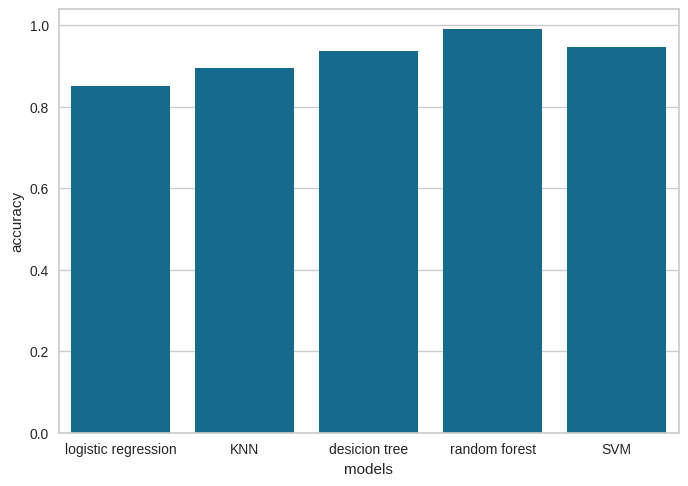

In [ ]:
#visualizing the accuracy of each model
sns.barplot(x='models',y='accuracy',data=model_df)